# WeatherPy
----

### Analysis
* As expected, the weather becomes significantly warmer as one approaches the equator (0 Deg. Latitude). More interestingly, however, is the fact that the southern hemisphere tends to be warmer this time of year than the northern hemisphere. This may be due to the tilt of the earth.
* There is no strong relationship between latitude and cloudiness. However, it is interesting to see that a strong band of cities sits at 0, 80, and 100% cloudiness.
* There is no strong relationship between latitude and wind speed. However, in northern hemispheres there is a flurry of cities with over 20 mph of wind.

---

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

In [2]:
# Import API key
from config import api_key

In [3]:
# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy
# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
country = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
city_count =len(cities)
city_count

617

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#Create base URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

In [6]:
#Query URL
query_url = f"{url}appid={api_key}&units={units}&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=2175a7cb37169e0f1eea3d12f497bc6f&units=imperial&q='

In [7]:
#more lists
latitude =[]
longitude =[]
temp =[]
humidity=[]
cloudiness=[]
wind_speed=[]
date=[]
country=[]

In [8]:
#for loop
print("Beginning Data Retrieval")
print('---------------------------')
for ct in range(city_count):
    response = requests.get(f"{query_url}{cities[ct]}").json()
    
    try:
        latitude.append(response['coord']['lat'])
        longitude.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        cloudiness.append(response['clouds']['all'])
        wind_speed.append(response['wind']['speed'])
        date.append(response['dt'])
        country.append(response['sys']['country'])
    except KeyError:
        latitude.append(np.nan)
        longitude.append(np.nan)
        temp.append(np.nan)
        humidity.append(np.nan)
        cloudiness.append(0)
        wind_speed.append(np.nan)
        date.append(np.nan)
        country.append(np.nan)

    
    print(f'Processing Record {ct+1} | {cities[ct]}')
    
print('-------------------------------')
print('Data Processing Complete')
print('-------------------------------')

Beginning Data Retrieval
---------------------------
Processing Record 1 | hobart
Processing Record 2 | san cristobal
Processing Record 3 | korla
Processing Record 4 | grand river south east
Processing Record 5 | hermanus
Processing Record 6 | santa rosalia
Processing Record 7 | sorland
Processing Record 8 | nikolskoye
Processing Record 9 | atuona
Processing Record 10 | tuktoyaktuk
Processing Record 11 | iskilip
Processing Record 12 | vizinga
Processing Record 13 | yellowknife
Processing Record 14 | linqiong
Processing Record 15 | erdenet
Processing Record 16 | saint-augustin
Processing Record 17 | bridlington
Processing Record 18 | kodiak
Processing Record 19 | mendi
Processing Record 20 | mataura
Processing Record 21 | provideniya
Processing Record 22 | vaini
Processing Record 23 | anchorage
Processing Record 24 | cidreira
Processing Record 25 | saint-philippe
Processing Record 26 | ribeira grande
Processing Record 27 | vila velha
Processing Record 28 | ayan
Processing Record 29 | so

Processing Record 247 | bujanovac
Processing Record 248 | bilma
Processing Record 249 | bluff
Processing Record 250 | vaitupu
Processing Record 251 | carutapera
Processing Record 252 | sao joao da barra
Processing Record 253 | pisco
Processing Record 254 | egvekinot
Processing Record 255 | pontiac
Processing Record 256 | srivardhan
Processing Record 257 | nanortalik
Processing Record 258 | tiksi
Processing Record 259 | beringovskiy
Processing Record 260 | gizo
Processing Record 261 | port lincoln
Processing Record 262 | srikakulam
Processing Record 263 | ahuimanu
Processing Record 264 | awbari
Processing Record 265 | olinda
Processing Record 266 | amderma
Processing Record 267 | esperance
Processing Record 268 | touros
Processing Record 269 | noumea
Processing Record 270 | haines junction
Processing Record 271 | whyalla
Processing Record 272 | adrar
Processing Record 273 | bathsheba
Processing Record 274 | nipawin
Processing Record 275 | luderitz
Processing Record 276 | severo-yeniseys

Processing Record 494 | port blair
Processing Record 495 | lata
Processing Record 496 | storforshei
Processing Record 497 | baghdogra
Processing Record 498 | santa cruz
Processing Record 499 | maragogi
Processing Record 500 | baykit
Processing Record 501 | qasigiannguit
Processing Record 502 | zafra
Processing Record 503 | puerto escondido
Processing Record 504 | merrill
Processing Record 505 | nguiu
Processing Record 506 | huambo
Processing Record 507 | bulawayo
Processing Record 508 | mugur-aksy
Processing Record 509 | kandrian
Processing Record 510 | vostok
Processing Record 511 | alotau
Processing Record 512 | kyren
Processing Record 513 | humberto de campos
Processing Record 514 | verkhnevilyuysk
Processing Record 515 | rorvik
Processing Record 516 | tabiauea
Processing Record 517 | honiara
Processing Record 518 | maureni
Processing Record 519 | altay
Processing Record 520 | gazanjyk
Processing Record 521 | turukhansk
Processing Record 522 | morozovsk
Processing Record 523 | russk

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [9]:
#create data frame
city_weather = pd.DataFrame({"City":cities,
                            "Cloudiness": cloudiness,
                            "Country": country,
                            "Date": date,
                            "Humidity": humidity,
                            "Lat": latitude,
                            "Lng": longitude,
                            "Max Temp": temp,
                            "Wind Speed": wind_speed,
                            })
#remove empty values
city_weather = city_weather.dropna(how='any')

# Output File (CSV)
city_weather.to_csv = "city_weather.csv"

city_weather.head()

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,hobart,40,AU,1.541741e+09,39.0,-42.88,147.33,64.40,6.93
1,san cristobal,75,EC,1.541740e+09,87.0,-0.39,-78.55,53.60,6.93
4,hermanus,0,ZA,1.541743e+09,76.0,-34.42,19.24,58.72,5.03
5,santa rosalia,0,IT,1.541741e+09,76.0,38.07,13.27,55.40,2.24
6,sorland,75,NO,1.541741e+09,81.0,67.67,12.69,42.80,5.82


In [10]:
city_weather.count()

City          548
Cloudiness    548
Country       548
Date          548
Humidity      548
Lat           548
Lng           548
Max Temp      548
Wind Speed    548
dtype: int64

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

In [11]:
#pull date 
date = time.strftime("%m/%d/%Y")

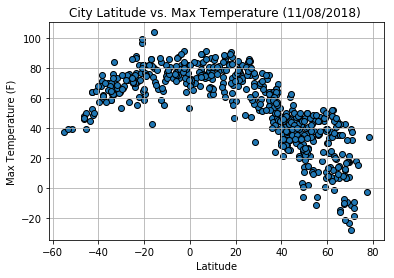

In [12]:
#plot lat vs temp (max temp)
plt.scatter(city_weather['Lat'], city_weather['Max Temp'], edgecolor="black")
plt.title(f"City Latitude vs. Max Temperature ({date}) ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid()
#save figure
plt.savefig("figures/Temp(F) vs Latitude.png")
#show figure
plt.show()

#### Latitude vs. Humidity Plot

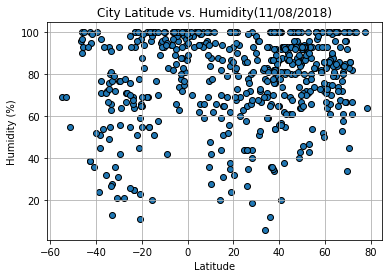

In [13]:
plt.scatter(city_weather['Lat'], city_weather['Humidity'], edgecolor="black")
plt.title(f'City Latitude vs. Humidity({date})')
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()
#save figure
plt.savefig("figures/Humidity(%) vs Latitude.png")
#show figure
plt.show()

#### Latitude vs. Cloudiness Plot

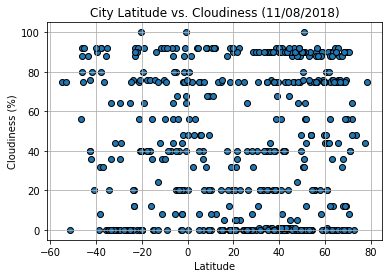

In [14]:
plt.scatter(city_weather['Lat'], city_weather['Cloudiness'], edgecolor="black")
plt.title(f'City Latitude vs. Cloudiness ({date})')
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()
#save figure
plt.savefig("figures/Cloudiness(%) vs Latitude.png")
#show figure
plt.show()

#### Latitude vs. Wind Speed Plot

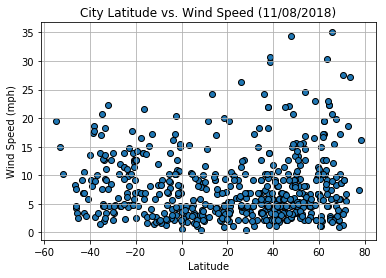

In [15]:
plt.scatter(city_weather['Lat'], city_weather['Wind Speed'], edgecolor="black")
plt.title(f'City Latitude vs. Wind Speed ({date})')
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.grid()
#save figure
plt.savefig("figures/Wind Speed vs Latitude.png")
#show figure
plt.show()